In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Current Data
The file I've been collecting data in on a raspberry pi:

In [5]:
file = '/Users/admin/Desktop/Covidiot2.csv'

In [6]:
covid_df = pd.read_csv(file, sep='\t', usecols=['datetime', 'USA', 'Canada', 'Mexico', 'Italy', 'France', 
                                              'Germany', 'Spain', 'UK', 'Japan', 'S. Korea', 'India', 
                                              'Philippines', 'Brazil', 'Venezuela', 'Peru', 'South Africa', 
                                              'Egypt', 'Nigeria', 'Ethiopia', 'Iran', 'Israel', 'Australia'])

### Datetime
Coverts the datetime to a workable format within Pandas

In [7]:
covid_df['datetime'] = pd.to_datetime(covid_df['datetime'])
covid_df = covid_df.set_index('datetime')

Removes some countries with a discrepancy in rate when the sources were changed

In [8]:
covid_df = covid_df.drop(['France', 'Spain', 'UK'], axis=1)
covid_df.tail()

,USA,Canada,Mexico,Italy,Germany,Japan,S. Korea,India,Philippines,Brazil,Venezuela,Peru,South Africa,Egypt,Nigeria,Ethiopia,Iran,Israel,Australia
datetime,,,,,,,,,,,,,,,,,,,
2020-07-18 17:15:04.179487,1.111004,0.291014,0.256954,0.402475,0.239619,0.019080,0.026743,0.075269,0.059594,0.971177,0.039355,1.047976,0.591615,0.083814,0.016257,0.007372,0.323368,0.537760,0.044051
2020-07-21 21:01:48.748392,1.199589,0.295948,0.270991,0.404804,0.243352,0.020348,0.026948,0.083709,0.064577,1.019259,0.044922,1.098170,0.643747,0.087046,0.018338,0.009631,0.331965,0.624363,0.048047
2020-07-22 05:15:04.544892,1.199589,0.295948,0.276311,0.404804,0.243352,0.020348,0.027071,0.086443,0.064577,1.019259,0.044922,1.098170,0.643747,0.087046,0.018338,0.009631,0.331965,0.631538,0.048047
2020-07-22 17:15:04.050299,1.199589,0.295948,0.276311,0.404804,0.243352,0.020348,0.027071,0.086443,0.065950,1.019259,0.044922,1.098170,0.643747,0.087046,0.018338,0.009631,0.331965,0.631538,0.050534
2020-07-25 15:58:26.918637,1.242446,0.299911,0.293397,0.406190,0.244634,0.022760,0.027486,0.096874,0.069760,1.102452,0.050158,1.140248,0.711525,0.088995,0.019181,0.010380,0.338164,0.687133,0.053314


### Maximum
Since the axis is always changing (the rate is constantly increasing!!!) a maximum can be set to keep the data in the pyplot range

In [9]:
max_vals = covid_df.iloc[-1, :].tolist()
maximum = sorted(max_vals[0:len(max_vals)], reverse=True)[0] + .05
maximum

1.292445940410308

## Graphing covid rate in pyplot

<function matplotlib.pyplot.show(*args, **kw)>

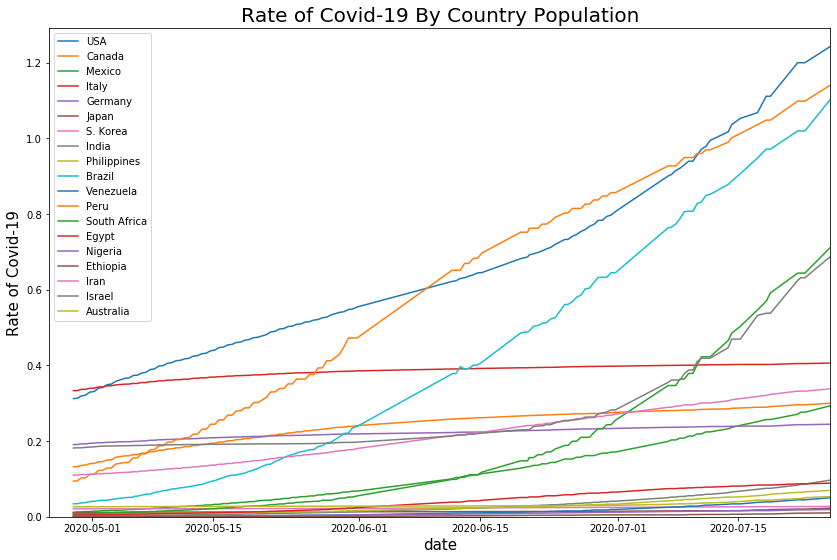

In [10]:
plt.figure(figsize=(14,9))

plt.plot(covid_df.index, covid_df.loc[:, 'USA': 'Australia'])
plt.legend(covid_df.columns, loc='upper left')
plt.ylabel('Rate of Covid-19', fontsize=15)
plt.xlabel('date', fontsize=15)
plt.title('Rate of Covid-19 By Country Population', fontsize=20)
plt.axis([pd.to_datetime('2020-04-26'), datetime.now(), 0, maximum])
plt.show